<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Exercise_4_Semi_Supervised_%26_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error

# Part 1 Semi-Supervised Learning

## Question 1

### Load Dataset

In [2]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Describe Dataset

In [3]:
df.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


### Histograms

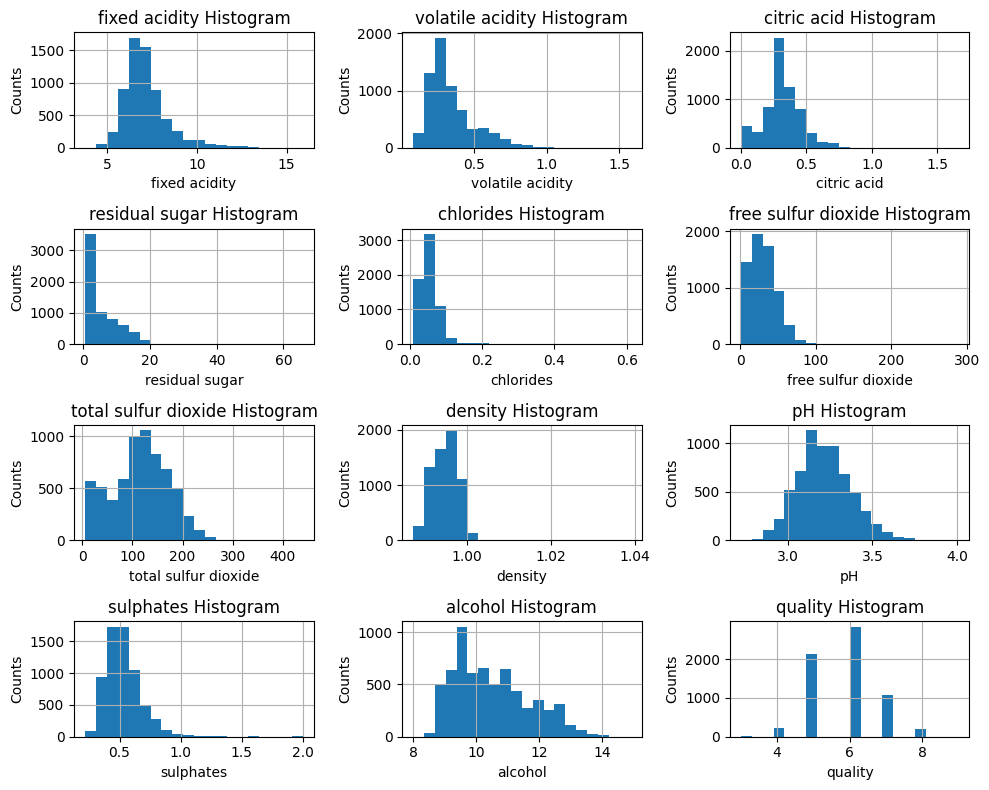

In [4]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
figure, axes = plt.subplots(4, 3, figsize=(10,8))

axes = axes.flatten()
for i, col in enumerate(columns):
    df[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')

plt.tight_layout()
plt.show()

### Bar Plots

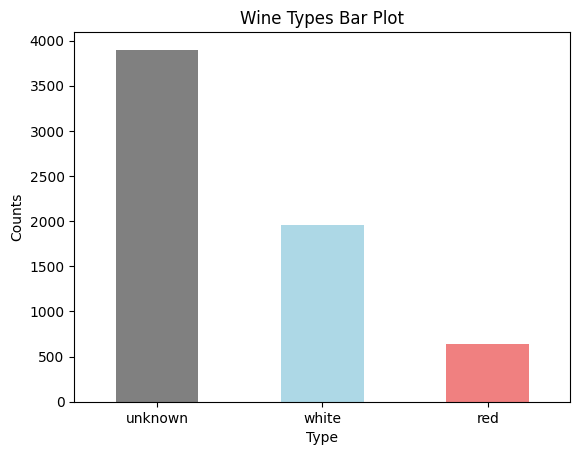

In [5]:
counts = df['type'].value_counts()
counts.plot.bar(counts.index, counts.values, color=['gray', 'lightblue', 'lightcoral'], rot = 0)
plt.title('Wine Types Bar Plot')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()

## Question 2

In [6]:
type_map = {'white': 0, 'red': 1, 'unknown': 2}
df['type'] = df['type'].map(type_map)
x = df.drop('type', axis=1).values
y = df['type'].values
x.shape, y.shape

((6497, 12), (6497,))

## Question 3

In [7]:
x_known = x[y != 2]
y_known = y[y != 2]
x_unknown = x[y == 2]
x_known.shape, y_known.shape, x_unknown.shape

((2599, 12), (2599,), (3898, 12))

## Question 4

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=0.3, random_state=42, stratify=y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

## Question 5

### Create and train Random Forest Model

In [9]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model on test set

In [10]:
y_pred_test = model_rf.predict(x_test)
y_pred_test

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [11]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1 Score: {test_f1}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')

Test Accuracy: 0.9987179487179487
Test F1 Score: 0.9974025974025974
Test Precision: 0.9948186528497409
Test Recall: 1.0


### Evaluate Model on train set

In [12]:
y_pred_train = model_rf.predict(x_train)
y_pred_train

array([1, 0, 0, ..., 0, 0, 0])

In [13]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy}')
print(f'Train F1 Score: {train_f1}')
print(f'Train Precision: {train_precision}')
print(f'Train Recall: {train_recall}')

Train Accuracy: 0.999450247388675
Train F1 Score: 0.9988851727982163
Train Precision: 0.9977728285077951
Train Recall: 1.0


In [14]:
unique, counts = np.unique(y_known, return_counts=True)
print(f"\nClass distribution: {dict(zip(unique, counts))}")
class_ratio = counts[0] / counts[1] if counts[0] < counts[1] else counts[1] / counts[0]
print(f"Class ratio: {class_ratio:.2f}")

if class_ratio > 0.8:
    print("\nThe dataset is relatively balanced, so Accuracy is representative.")
else:
    print("\nThe dataset is imbalanced, so F1-Score is more representative.")


Class distribution: {np.int64(0): np.int64(1959), np.int64(1): np.int64(640)}
Class ratio: 0.33

The dataset is imbalanced, so F1-Score is more representative.


Since in this case the class distribution is not balanced, the F1-Score will be more representative of the dataset than the accuracy score, as it takes into consideration precision and recall, that is correctly predicted positive values and the total amount of positive values predicted, be they true or false.

## Question 6

### Create and train Random Forest Model

In [15]:
model_rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf_balanced.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

According to the sklearn documentation on the RandomForestClassifier, the class_weight parameter in the balanced mode uses the y values in order to automatically adjust weights inversely proprotional to class frequencies in the input data by using the function n_samples / (n_classes * np.bincount(y)). It helps when there is class imbalance in the dataset so mistakes in rare classes are punished more harshly by the classifier.

### Evaluate Model on test set

In [16]:
y_pred_test_balanced = model_rf_balanced.predict(x_test)
y_pred_test_balanced

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [17]:
test_accuracy_balanced = accuracy_score(y_test, y_pred_test_balanced)
test_f1_balanced = f1_score(y_test, y_pred_test_balanced)
test_precision_balanced = precision_score(y_test, y_pred_test_balanced)
test_recall_balanced = recall_score(y_test, y_pred_test_balanced)
print(f'Test Accuracy: {test_accuracy_balanced}')
print(f'Test F1 Score: {test_f1_balanced}')
print(f'Test Precision: {test_precision_balanced}')
print(f'Test Recall: {test_recall_balanced}')

Test Accuracy: 0.9948717948717949
Test F1 Score: 0.9895287958115183
Test Precision: 0.9947368421052631
Test Recall: 0.984375


### Evaluate Model on train set

In [18]:
y_pred_train_balanced = model_rf_balanced.predict(x_train)
y_pred_train_balanced

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
train_accuracy_balanced = accuracy_score(y_train, y_pred_train_balanced)
train_f1_balanced = f1_score(y_train, y_pred_train_balanced)
train_precision_balanced = precision_score(y_train, y_pred_train_balanced)
train_recall_balanced = recall_score(y_train, y_pred_train_balanced)
print(f'Train Accuracy: {train_accuracy_balanced}')
print(f'Train F1 Score: {train_f1_balanced}')
print(f'Train Precision: {train_precision_balanced}')
print(f'Train Recall: {train_recall_balanced}')

Train Accuracy: 0.999450247388675
Train F1 Score: 0.9988851727982163
Train Precision: 0.9977728285077951
Train Recall: 1.0


## Question 7

In [20]:
y_predict_proba = model_rf_balanced.predict_proba(x_unknown)
y_predict_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]])

## Question 8

In [21]:
proba_red = y_predict_proba[:, 1]

high_confidence_red = proba_red > 0.65
high_confidence_white = proba_red < 0.35

y_unknown_pred = np.full(len(x_unknown), -1)
y_unknown_pred[high_confidence_red] = 1
y_unknown_pred[high_confidence_white] = 0

## Question 9

In [22]:
label_mask = y_unknown_pred != -1
x_unknown_labeled = x_unknown[label_mask]
y_unknown_labeled = y_unknown_pred[label_mask]

x_train_extended = np.concatenate((x_train, x_unknown_labeled))
y_train_extended = np.concatenate((y_train, y_unknown_labeled))

x_train_extended.shape, y_train_extended.shape

((5666, 12), (5666,))

### Create and train Random Forest Model

In [23]:
model_rf_extended = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf_extended.fit(x_train_extended, y_train_extended)

RandomForestClassifier(class_weight='balanced', random_state=42)

### Evaluate Model on test set

In [24]:
y_pred_test_extended = model_rf_extended.predict(x_test)
y_pred_test_extended

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [25]:
test_accuracy_extended = accuracy_score(y_test, y_pred_test_extended)
print(f'Test Accuracy: {test_accuracy_extended}')

Test Accuracy: 0.9948717948717949


### Evaluate Model on train set

In [26]:
y_pred_train_extended = model_rf_extended.predict(x_train)
y_pred_train_extended

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
train_accuracy_extended = accuracy_score(y_train, y_pred_train_extended)
print(f'Train Accuracy: {train_accuracy_extended}')

Train Accuracy: 0.999450247388675


## Question 10

In [28]:
x_train_current = x_train_extended.copy()
y_train_current = y_train_extended.copy()
x_unknown_current = x_unknown.copy()

iteration = 0
max_iterations = 10
while len(x_unknown_current) > 0 and iteration < max_iterations:
    print(f"Iteration: {iteration}")

    model_rf_iter = RandomForestClassifier(class_weight='balanced', random_state=42)
    model_rf_iter.fit(x_train_current, y_train_current)

    y_predict_proba_iter = model_rf_iter.predict_proba(x_unknown_current)
    proba_red_iter = y_predict_proba_iter[:, 1]

    high_confidence_red_iter = proba_red_iter > 0.65
    high_confidence_white_iter = proba_red_iter < 0.35

    y_unknown_pred_iter = np.full(len(x_unknown_current), -1)
    y_unknown_pred_iter[high_confidence_red_iter] = 1
    y_unknown_pred_iter[high_confidence_white_iter] = 0

    label_mask_iter = y_unknown_pred_iter != -1
    num_labeled_iter = np.sum(label_mask_iter)
    num_red = np.sum(high_confidence_red_iter)
    num_white = np.sum(high_confidence_white_iter)

    print(f"Unknown samples remaining: {len(x_unknown_current)}")
    print(f"High confidence predictions: {num_labeled_iter}")
    print(f"  - Predicted as red: {num_red}")
    print(f"  - Predicted as white: {num_white}")

    if(num_labeled_iter == 0):
      break

    x_high_confidence = x_unknown_current[label_mask_iter]
    y_high_confidence = y_unknown_pred_iter[label_mask_iter]

    x_train_current = np.concatenate((x_train_current, x_high_confidence))
    y_train_current = np.concatenate((y_train_current, y_high_confidence))

    x_unknown_current = x_unknown_current[~label_mask_iter]

    model_rf_iter.fit(x_train_current, y_train_current)
    y_pred_test_iter = model_rf_iter.predict(x_test)
    test_accuracy_iter = accuracy_score(y_test, y_pred_test_iter)
    print(f'Test Accuracy: {test_accuracy_iter}')
    y_pred_train_iter = model_rf_iter.predict(x_train)
    train_accuracy_iter = accuracy_score(y_train, y_pred_train_iter)
    print(f'Train Accuracy: {train_accuracy_iter}')
    print()
    iteration += 1


Iteration: 0
Unknown samples remaining: 3898
High confidence predictions: 3870
  - Predicted as red: 918
  - Predicted as white: 2952
Test Accuracy: 0.9948717948717949
Train Accuracy: 0.999450247388675

Iteration: 1
Unknown samples remaining: 28
High confidence predictions: 3
  - Predicted as red: 2
  - Predicted as white: 1
Test Accuracy: 0.9974358974358974
Train Accuracy: 0.999450247388675

Iteration: 2
Unknown samples remaining: 25
High confidence predictions: 3
  - Predicted as red: 2
  - Predicted as white: 1
Test Accuracy: 0.9961538461538462
Train Accuracy: 0.999450247388675

Iteration: 3
Unknown samples remaining: 22
High confidence predictions: 2
  - Predicted as red: 1
  - Predicted as white: 1
Test Accuracy: 0.9948717948717949
Train Accuracy: 0.999450247388675

Iteration: 4
Unknown samples remaining: 20
High confidence predictions: 0
  - Predicted as red: 0
  - Predicted as white: 0


# Part 2 Model Evaluation

## Question 1

### Load Dataset

In [29]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Quality Plot

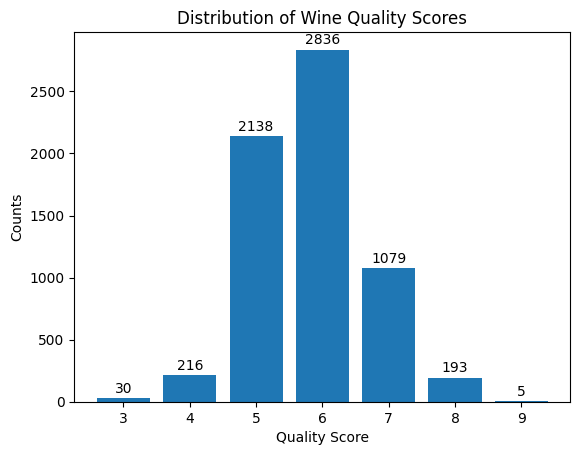

In [30]:
counts = df['quality'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Quality Score')
plt.ylabel('Counts')
plt.title('Distribution of Wine Quality Scores')
for i, v in enumerate(counts.values):
    plt.text(counts.index[i], v + 20, str(v), ha='center', va='bottom')

I believe that the quality is imbalanced as the majority of the values are concentrated in 5, 6 and 7, as can be seen in the graph. This leaves the rest of the quality scores underrepresented in the dataset and allows for bias and errors to occur in predictions later down the line.

## Question 2

### Quality Stats

In [31]:
red_quality_df = df[df['type'] == 'red']['quality']
white_quality_df = df[df['type'] == 'white']['quality']

print(f'Red Quality Count: {red_quality_df.count()}')
print(f'Red Quality Mean: {red_quality_df.mean()}')
print(f'Red Quality Median: {red_quality_df.median()}')
print(f'Red Quality Std: {red_quality_df.std()}')
print()
print(f'White Quality Count: {white_quality_df.count()}')
print(f'White Quality Mean: {white_quality_df.mean()}')
print(f'White Quality Median: {white_quality_df.median()}')
print(f'White Quality Std: {white_quality_df.std()}')
print()

diff = white_quality_df.mean() - red_quality_df.mean()
print(f'Difference (White - Red): {diff}')

Red Quality Count: 1599
Red Quality Mean: 5.6360225140712945
Red Quality Median: 6.0
Red Quality Std: 0.8075694397347023

White Quality Count: 4898
White Quality Mean: 5.87790935075541
White Quality Median: 6.0
White Quality Std: 0.8856385749678454

Difference (White - Red): 0.2418868366841158


### Box Plot

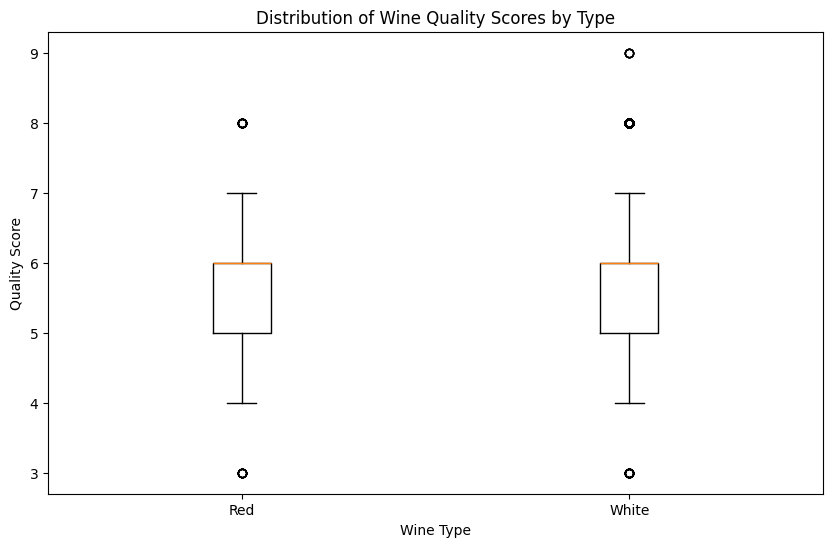

In [32]:
plt.figure(figsize=(10, 6))
plt.boxplot([red_quality_df, white_quality_df])
plt.xticks([1, 2], ['Red', 'White'])
plt.xlabel('Wine Type')
plt.ylabel('Quality Score')
plt.title('Distribution of Wine Quality Scores by Type')
plt.show()

It can be surmised that White wines, albeit by a tiny margin, have better quality, as can be see by the 0.24 improvement in mean quality score. While the standard deviation of the white is a bit higher than that of red, the difference is minimal so a decision cannot be made from just that information.

## Question 3

### Sweetness Stats

In [33]:
df['sweetness'] = pd.cut(df['residual sugar'], bins=[0, 4, float('inf')], labels=['Dry', 'Sweet'])

sweetness_stats = df.groupby('sweetness')['quality'].agg(['mean', 'median', 'std', 'count'])
sweetness_stats

/tmp/ipython-input-2709133253.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sweetness_stats = df.groupby('sweetness')['quality'].agg(['mean', 'median', 'std', 'count'])


,mean,median,std,count
sweetness,,,,
Dry,5.822079,6.0,0.884917,3569
Sweet,5.813397,6.0,0.858963,2926


### Box Plot

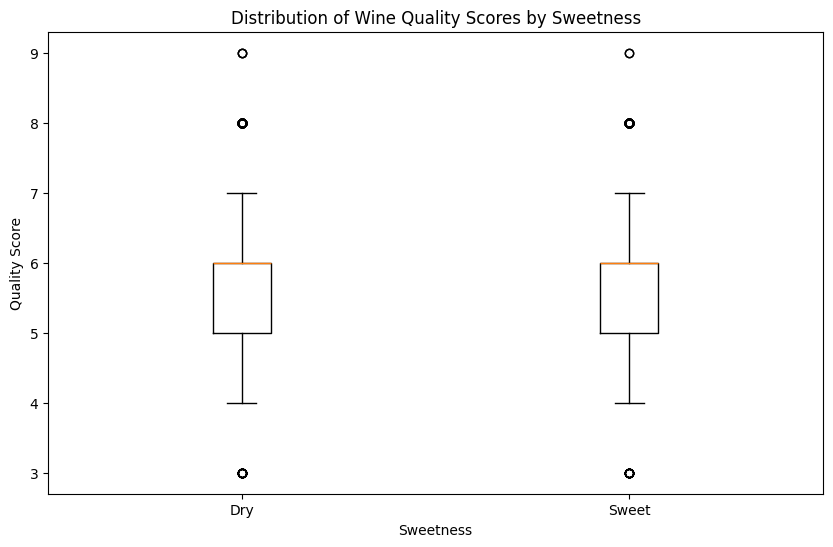

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['sweetness'] == 'Dry']['quality'], df[df['sweetness'] == 'Sweet']['quality']])
plt.xticks([1, 2], ['Dry', 'Sweet'])
plt.xlabel('Sweetness')
plt.ylabel('Quality Score')
plt.title('Distribution of Wine Quality Scores by Sweetness')
plt.show()

By examining the sweetness statistics and especially the mean quality scores of the wine types, it can be surmised that the dry wines have a slight edge in quality over the sweet ones with a minor 0.01 higher mean. At the same time they have a higher standard deviation by 0.03 which could signal higher highs and lower lows for the wines the could contribute to the higher mean, but the differences are so minimal a concrete decision cannot be made.

### Remove Sweetness from DF

In [35]:
df = df.drop('sweetness', axis=1)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Question 4

### Convert DataFrame to Numpy arrays

In [36]:
df['type'] = df['type'].map({'white': 0, 'red': 1})
x = df.drop('quality', axis=1).values
y = df['quality'].values
x.shape, y.shape

((6497, 12), (6497,))

### Split Dataset to Train-Test

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

## Question 5

### Create and train Decision Tree Model

In [38]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

### Evaluate Model on test set with MAE

In [39]:
y_pred_test = model.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Test MAE: {mae_test}')

Test MAE: 0.44769230769230767


## Question 6

In [40]:
mae_scores = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)
    model = DecisionTreeRegressor(random_state=0)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    mae_score = mean_absolute_error(y_test, y_pred_test)
    mae_scores.append(mae_score)
mae_scores = np.array(mae_scores)
print(f'Mean MAE: {mae_scores.mean()}')
print(f'Std MAE: {mae_scores.std()}')

Mean MAE: 0.4661538461538462
Std MAE: 0.026832815729997475


As the MAE standard deviation is quite low at around 0.02, the model is reliable with a stable error value. This can help determine how the model will fare when new data is introduced to it.

## Question 7

### Create validation set

In [41]:
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
x_train_split.shape, y_train_split.shape, x_val.shape, y_val.shape

((4677, 12), (4677,), (1170, 12), (1170,))

### Parameter combination testing

In [42]:
param_combinations = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 5},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 10},
    {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 10},
    {'max_depth': 20, 'min_samples_split': 50, 'min_samples_leaf': 20},
]

mae_scores = []
for params in param_combinations:
  regressor = DecisionTreeRegressor(random_state=0, **params)
  regressor.fit(x_train_split, y_train_split)
  y_pred_train = regressor.predict(x_train_split)
  y_pred_val = regressor.predict(x_val)
  mae_train = mean_absolute_error(y_train_split, y_pred_train)
  mae_val = mean_absolute_error(y_val, y_pred_val)
  mae_scores.append(
      {
          'params': params,
          'mae_train': mae_train,
          'mae_val': mae_val
      }
  )
results_df = pd.DataFrame(mae_scores)
results_df

,params,mae_train,mae_val
0,"{'max_depth': 3, 'min_samples_split': 2, 'min_...",0.584908,0.609461
1,"{'max_depth': 5, 'min_samples_split': 2, 'min_...",0.545978,0.599920
2,"{'max_depth': 7, 'min_samples_split': 2, 'min_...",0.487283,0.587785
3,"{'max_depth': 10, 'min_samples_split': 2, 'min...",0.351160,0.550378
4,"{'max_depth': 15, 'min_samples_split': 2, 'min...",0.109930,0.508479
5,"{'max_depth': 5, 'min_samples_split': 5, 'min_...",0.545978,0.599920
6,"{'max_depth': 5, 'min_samples_split': 10, 'min...",0.545978,0.599920
7,"{'max_depth': 5, 'min_samples_split': 20, 'min...",0.546117,0.597322
8,"{'max_depth': 5, 'min_samples_split': 2, 'min_...",0.545089,0.599628
9,"{'max_depth': 5, 'min_samples_split': 2, 'min_...",0.543734,0.601979


## Question 8

### Validation set best parameters

In [43]:
best_params_train = results_df.loc[results_df['mae_train'].idxmin()]['params']
best_mae_train = results_df.loc[results_df['mae_train'].idxmin()]['mae_train']
print(f'Best parameters: {best_params_train}')
print(f'Best training MAE: {best_mae_train}')

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best training MAE: 0.10993012896141471


### Training set best parameters

In [44]:
best_params_val = results_df.loc[results_df['mae_val'].idxmin()]['params']
best_mae_val = results_df.loc[results_df['mae_val'].idxmin()]['mae_val']
print(f'Best parameters: {best_params_val}')
print(f'Best validation MAE: {best_mae_val}')

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best validation MAE: 0.5084791446733636


The validation set is usually used for hyperparameter selection as it lowers overfitting, that can be caused from using the training set only, by simulating new data from the original data set. This can also be seen, in a way, in the previous values with the training test giving a MAE of 0.1 while the validation set had a more reasonable, when looking at the rest of the values, 0.5. This could point to overfitting.

## Question 9

### Grid Search Cross-Validation

In [45]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_absolute_error', verbose=1)

### Best model parameters and mean MAE

In [46]:
best_model_cv = grid_search.best_estimator_
best_params_cv = grid_search.best_params_
best_mae_cv = -grid_search.best_score_
print(f'Best parameters: {best_params_cv}')
print(f'Best MAE: {best_mae_cv}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best MAE: 0.48452201147406626


## Question 10

In [47]:
y_pred_test_cv = best_model_cv.predict(x_test)
mae_test_cv = mean_absolute_error(y_test, y_pred_test_cv)
print(f'Test MAE: {mae_test_cv}')

Test MAE: 0.4846153846153846


The most trustworthy of the methods that were used was the one used in Question 9, that is cross-validation. This method not only uses the data set for training and validation of the model, thus reducing overfitting and variability but it also provides more realistic error estimation than the others. Moreover, it is more stable than the single split method from Question 7, as well as more systematic than the multiple seeds from Question 6.

## Question 11

### Grid Search Cross-Validation with max depth 5

In [48]:
param_grid_fixed ={
    'max_depth': [5],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}
grid_search_fixed = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid_fixed, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search_fixed.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_absolute_error', verbose=1)

### Best model parameters and mean MAE

In [49]:
best_model_cv_fixed = grid_search_fixed.best_estimator_
best_params_cv_fixed = grid_search_fixed.best_params_
best_mae_cv_fixed = -grid_search_fixed.best_score_
print(f'Best parameters: {best_params_cv_fixed}')
print(f'Best MAE: {best_mae_cv}')

Best parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best MAE: 0.48452201147406626


### Best Tree Plot

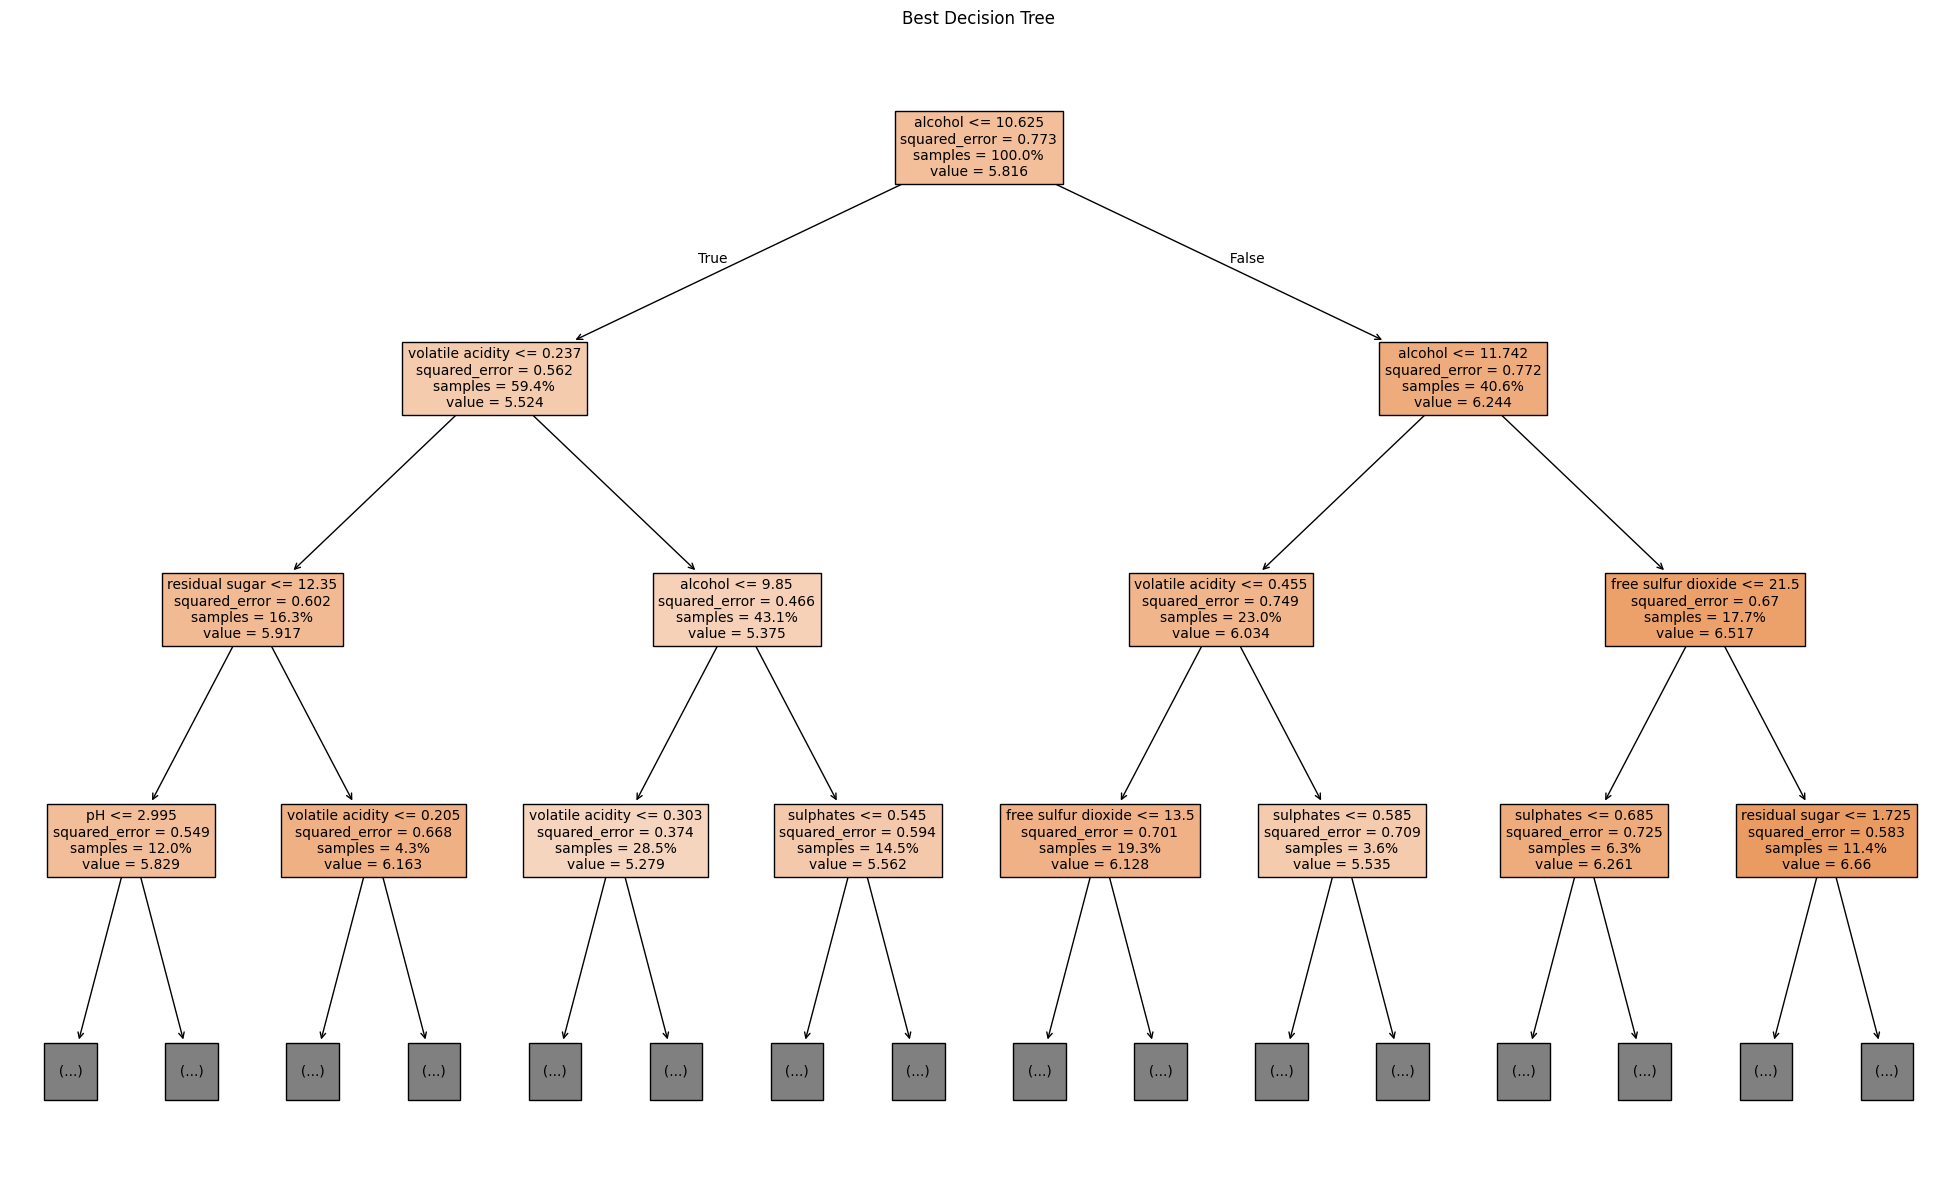

In [50]:
feature_names = df.drop('quality', axis=1).columns.to_list()

plt.figure(figsize=(25,15))
plot_tree(best_model_cv_fixed, feature_names=feature_names, filled=True, max_depth=3, fontsize=10, proportion=True)
plt.title('Best Decision Tree')
plt.show()

In [51]:
rules = export_text(best_model_cv_fixed, feature_names=feature_names)
print(rules)

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- residual sugar <= 12.35
|   |   |   |--- pH <= 3.00
|   |   |   |   |--- chlorides <= 0.04
|   |   |   |   |   |--- value: [4.96]
|   |   |   |   |--- chlorides >  0.04
|   |   |   |   |   |--- value: [5.67]
|   |   |   |--- pH >  3.00
|   |   |   |   |--- citric acid <= 0.23
|   |   |   |   |   |--- value: [5.47]
|   |   |   |   |--- citric acid >  0.23
|   |   |   |   |   |--- value: [5.92]
|   |   |--- residual sugar >  12.35
|   |   |   |--- volatile acidity <= 0.20
|   |   |   |   |--- chlorides <= 0.06
|   |   |   |   |   |--- value: [6.27]
|   |   |   |   |--- chlorides >  0.06
|   |   |   |   |   |--- value: [7.27]
|   |   |   |--- volatile acidity >  0.20
|   |   |   |   |--- free sulfur dioxide <= 32.50
|   |   |   |   |   |--- value: [5.22]
|   |   |   |   |--- free sulfur dioxide >  32.50
|   |   |   |   |   |--- value: [5.88]
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- 

### Feature Importance Bar Plot

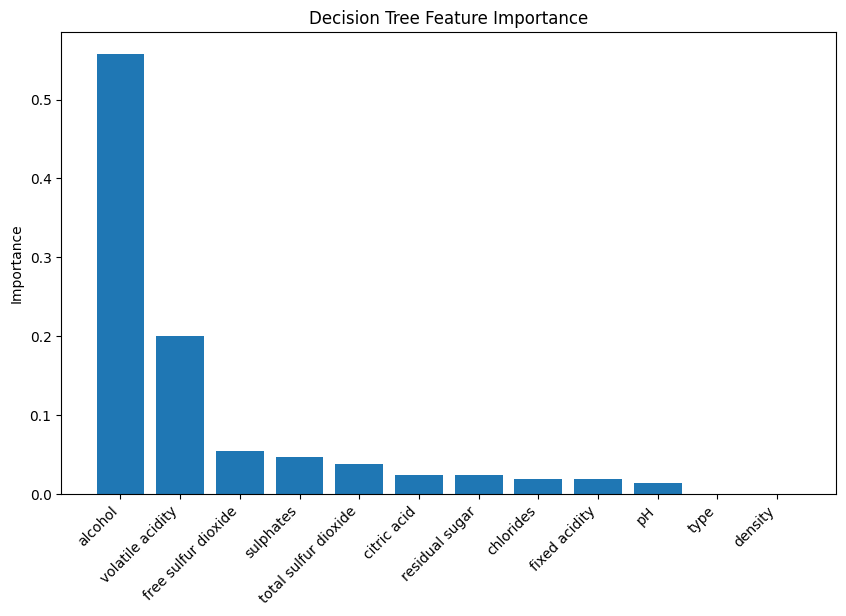

,feature,importance
11,alcohol,0.557408
2,volatile acidity,0.200776
6,free sulfur dioxide,0.055260
10,sulphates,0.047347
7,total sulfur dioxide,0.038286
3,citric acid,0.024790
4,residual sugar,0.023929
5,chlorides,0.019370
1,fixed acidity,0.018866
9,pH,0.013970


In [52]:
importances = best_model_cv_fixed.feature_importances_
df_feat_importances = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(df_feat_importances['feature'], df_feat_importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Decision Tree Feature Importance')
plt.ylabel('Importance')
plt.show()

display(df_feat_importances)